Gather some statistics about the datasets, vocabularies and codelists loaded into PMD.

In [1]:
import pandas as pd
from IPython.display import HTML

Find the distinct datasets

In [2]:
from io import StringIO
import requests

session = requests.Session()
result = session.post(
    'https://staging.gss-data.org.uk/sparql',
    headers={'Accept': 'text/csv; charset=utf-8'},
    stream=True,
    data={'query': '''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX qb:   <http://purl.org/linked-data/cube#>
PREFIX pmdcat:  <http://publishmydata.com/pmdcat#>
PREFIX gdp:  <http://gss-data.org.uk/def/gdp#>
PREFIX dcat: <http://www.w3.org/ns/dcat#>

SELECT DISTINCT ?Dataset ?Label ?Graph ?Theme
WHERE {
  { ?Dataset a dcat:Dataset } UNION { ?Dataset a pmdcat:Dataset } .
  ?Dataset
         rdfs:label ?Label ;
         pmdcat:graph ?Graph ;
         pmdcat:datasetContents [ a qb:DataSet ] .
  
  OPTIONAL {
    ?Dataset dcat:theme [rdfs:label ?Theme]
  }
}'''})

datasets = pd.read_csv(StringIO(result.content.decode('utf-8')), index_col='Graph', keep_default_na=False, dtype='str', na_values=[])
datasets

Dataset  \
Graph                                                                                                   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
...                                                                                               ...   
http://gss-data.org.uk/graph/gss_data/homelessn...  http://gss-data.org.uk/data/gss_data/homelessn...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   

                                                                                                Label  \
Graph                                                                                                   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Statistics relating to Covid-19 and the immigr...   
http://gss-data.org.uk/graph/gss_data/covid-19/...              Deaths involving COVID-19 in Scotland   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Notifications of deaths of residents related t...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Number of deaths in care homes notified to the...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Deaths involving COVID-19 in the care sector f...   
...                                                                                               ...   
http://gss-data.org.uk/graph/gss_data/homelessn...  Families in bed and breakfast accommodation fo...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  HMRC Overseas Trade Statistics - Combined Nome...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  HMRC Overseas Trade Statistics - Combined Nome...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...            HMRC Overseas Trade Statistics - SITCv4   
http://gss-data.org.uk/graph/gss_data/trade/hmr...            HMRC Overseas Trade Statistics - SITCv4   

                                                    Theme  
Graph                                                      
http://gss-data.org.uk/graph/gss_data/covid-19/...         
http://gss-data.org.uk/graph/gss_data/covid-19/...         
http://gss-data.org.uk/graph/gss_data/covid-19/...         
http://gss-data.org.uk/graph/gss_data/covid-19/...         
http://gss-data.org.uk/graph/gss_data/covid-19/...         
...                                                   ...  
http://gss-data.org.uk/graph/gss_data/homelessn...         
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  

[155 rows x 3 columns]

Find the sizes of the cubes.

In [3]:
result = session.post(
    'https://staging.gss-data.org.uk/sparql',
    headers={'Accept': 'text/csv; charset=utf-8'},
    stream=True,
    data={'query': '''
SELECT (COUNT(*) as ?Size) ?Graph
WHERE {
  GRAPH ?Graph {
    ?s ?p ?o
  }
} GROUP BY ?Graph
'''})

sizes = pd.read_csv(StringIO(result.content.decode('utf-8')), index_col='Graph')

In [4]:
table = datasets.join(sizes)
table

Dataset  \
Graph                                                                                                   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  http://gss-data.org.uk/data/gss_data/covid-19/...   
...                                                                                               ...   
http://gss-data.org.uk/graph/gss_data/homelessn...  http://gss-data.org.uk/data/gss_data/homelessn...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  http://gss-data.org.uk/data/gss_data/trade/hmr...   

                                                                                                Label  \
Graph                                                                                                   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Statistics relating to Covid-19 and the immigr...   
http://gss-data.org.uk/graph/gss_data/covid-19/...              Deaths involving COVID-19 in Scotland   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Notifications of deaths of residents related t...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Number of deaths in care homes notified to the...   
http://gss-data.org.uk/graph/gss_data/covid-19/...  Deaths involving COVID-19 in the care sector f...   
...                                                                                               ...   
http://gss-data.org.uk/graph/gss_data/homelessn...  Families in bed and breakfast accommodation fo...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  HMRC Overseas Trade Statistics - Combined Nome...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...  HMRC Overseas Trade Statistics - Combined Nome...   
http://gss-data.org.uk/graph/gss_data/trade/hmr...            HMRC Overseas Trade Statistics - SITCv4   
http://gss-data.org.uk/graph/gss_data/trade/hmr...            HMRC Overseas Trade Statistics - SITCv4   

                                                    Theme     Size  
Graph                                                               
http://gss-data.org.uk/graph/gss_data/covid-19/...            3417  
http://gss-data.org.uk/graph/gss_data/covid-19/...           53605  
http://gss-data.org.uk/graph/gss_data/covid-19/...          249156  
http://gss-data.org.uk/graph/gss_data/covid-19/...          515016  
http://gss-data.org.uk/graph/gss_data/covid-19/...          317055  
...                                                   ...      ...  
http://gss-data.org.uk/graph/gss_data/homelessn...           22724  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  5267346  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  5267286  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  3536988  
http://gss-data.org.uk/graph/gss_data/trade/hmr...  Trade  3536928  

[155 rows x 4 columns]

In [5]:
from urllib.parse import urlencode
def gss_url(uri):
    return 'http://staging.gss-data.org.uk/cube/explore?' + urlencode({
        'uri': uri
    })

table['Dataset'] = table.apply(lambda x: f'<a href="{gss_url(x.Dataset)}">{x.Label}</a>', axis=1)
table.drop(columns=['Label'], inplace=True)
table = table[['Dataset', 'Theme', 'Size']]
table = table.sort_values(by=['Theme', 'Dataset'])
table = table.set_index(['Theme', 'Dataset'])
pd.set_option('max_colwidth', -1)
with open('dataset-stats.html', 'w') as f:
    f.write(table.to_html(escape=False, index=True))
HTML(table.to_html(escape=False, index=True, justify='left'))

<ipython-input-5-77f1ed11ba91>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


<AxesSubplot:>

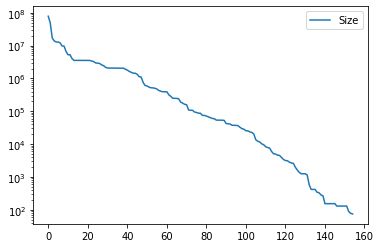

In [7]:
rank = table.sort_values(by='Size', ascending=False).reset_index(drop=True)
rank.plot(logy=True)